In [8]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


dtype = {
    'ip' :'uint32',
    'app' :'uint16',
    'device': 'uint16',
    'os' :'uint16',
    'channel': 'uint16',
    'is_attributed': 'uint8',
    'click_id': 'uint32',
}
predictor=['ip','app','device','os','channel','is_attributed','click_id']

def time_features(df):
    df['date'] = pd.to_datetime(df.click_time)
    df['hour'] = pd.to_datetime(df.click_time).dt.hour.astype('uint8')
    df['day'] = pd.to_datetime(df.click_time).dt.day.astype('uint8')
    df['minute'] = pd.to_datetime(df.click_time).dt.minute.astype('uint8')
    df['second'] = pd.to_datetime(df.click_time).dt.second.astype('uint8')
    df['in_test_hh'] = (3 - 2 * df['hour'].isin([4, 5, 9, 10, 13, 14])  # most frequent
                        - 1 * df['hour'].isin([6, 11, 15])).astype('uint8')  # least frequent
    # Dataframe['frequency_hour'] = Dataframe['hour'].value_counts().sort_index()
    # print(Dataframe.columns)
    predictor.append('date')
    predictor.append('hour')
    predictor.append('day')
    predictor.append('minute')
    predictor.append('second')
    predictor.append('om_test_hh')
    print(df.head())
    print('done')
    gc.collect()
    return df

def time_frequence(df):
    frequent_hour = df.hour.value_counts().sort_index()
    frequent_day = df.day.value_counts().sort_index()
    frequent_minute = df.minute.value_counts().sort_index()
    frequent_second = df.second.value_counts().sort_index()
    plt.figure(figsize=(15, 15))

    plt.subplot(221)
    frequent_hour.plot(kind='bar')
    plt.title("Frequent hours")
    plt.xlabel("Hours")
    plt.ylabel("Number")

    plt.subplot(222)
    frequent_day.plot(kind='bar')
    plt.title("Frequent days")
    plt.xlabel("Days")
    plt.ylabel("Number")

    plt.subplot(223)
    frequent_minute.plot(kind='bar')
    plt.xticks(np.arange(0, 69, step=10), (0, 9, 19, 29, 39, 49, 59))
    plt.title("Frequent  minutes")
    plt.xlabel("Minutes")
    plt.ylabel("Number")

    plt.subplot(224)
    frequent_second.plot(kind='bar')
    plt.xticks(np.arange(0, 69, step=10), (0, 9, 19, 29, 39, 49, 59))
    plt.title("Frequent seconds")
    plt.xlabel("Seconds")
    plt.ylabel("Number")
    plt.show()


def attributedAnalysis(df):
    var = ['day', 'hour']
    for feature in var:
        fig, ax = plt.subplots(figsize=(16, 6))
        # Calculate the percentage of target=1 per category value
        cat_perc = df[[feature, 'is_attributed']].groupby([feature], as_index=False).mean()
        cat_perc.sort_values(by='is_attributed', ascending=False, inplace=True)
        # Bar plot
        sns.barplot(ax=ax, x=feature, y='is_attributed', data=cat_perc)
        plt.ylabel('Percent of Download', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

       ip  app  device  os  channel          click_time  is_attributed  \
0   87540   12       1  13      497 2017-11-07 09:30:38              0   
1  105560   25       1  17      259 2017-11-07 13:40:27              0   
2  101424   12       1  19      212 2017-11-07 18:05:24              0   
3   94584   13       1  13      477 2017-11-07 04:58:08              0   
4   68413   12       1   1      178 2017-11-09 09:00:09              0   

                 date  hour  day  minute  second  in_test_hh  
0 2017-11-07 09:30:38     9    7      30      38           1  
1 2017-11-07 13:40:27    13    7      40      27           1  
2 2017-11-07 18:05:24    18    7       5      24           3  
3 2017-11-07 04:58:08     4    7      58       8           1  
4 2017-11-09 09:00:09     9    9       0       9           1  
done


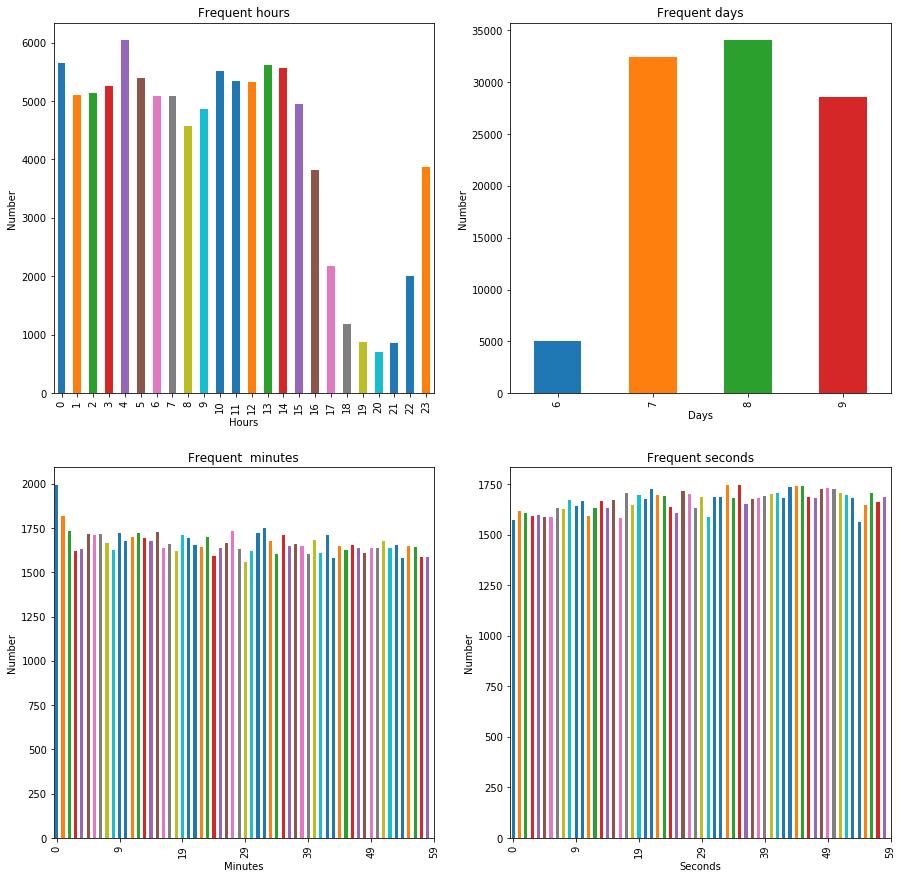

In [11]:
train_cols = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed']
train_df = pd.read_csv('train_sample.csv', dtype=dtype, usecols=train_cols, parse_dates=['click_time'])
time_features(train_df)
time_frequence(train_df)

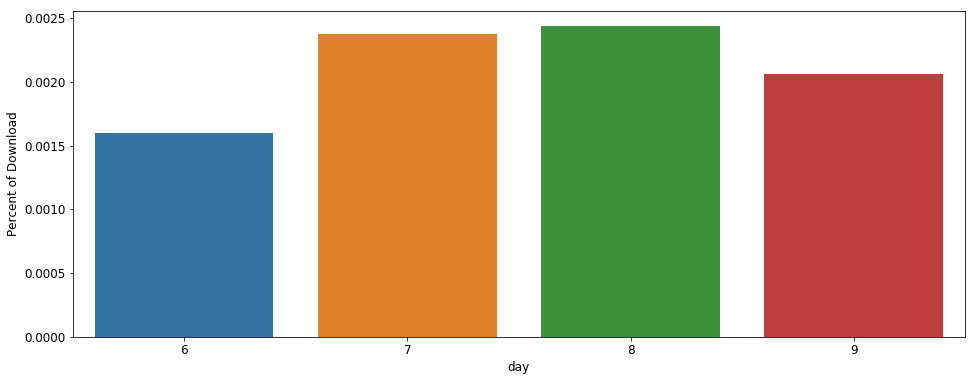

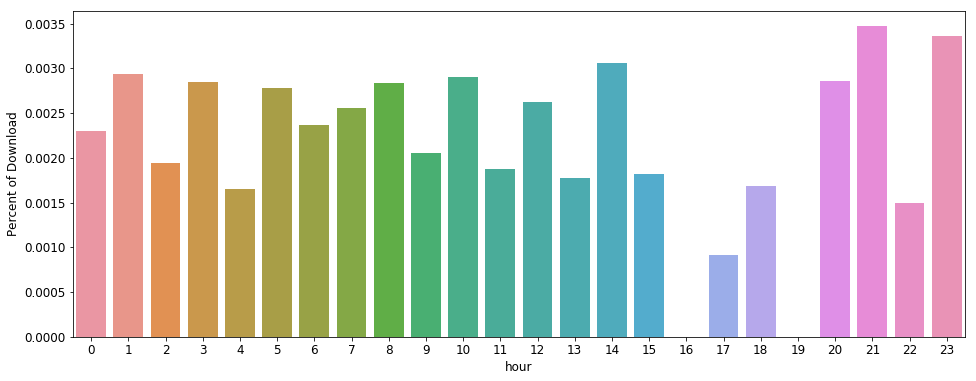

In [12]:
attributedAnalysis(train_df)